# Lybraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import random
import pickle
from sklearn import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Importing data

In [15]:
spotify=pd.read_csv(r"C:\Users\Portu\Desktop\Spotify\spotify.csv")
spotify.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [89]:
spotify.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

## Data cleaning

In [16]:
new = spotify["release_date"].str.split("-", n = 2, expand = True)
spotify["year"]=new[0]
spotify['year']=spotify["year"].astype(str).astype(int)
spotify.drop(columns='release_date', inplace=True)
spotify['twentys'] = np.where((spotify['year']>=1921) & (spotify["year"]<1930), 1, 0)
spotify['thirtys'] = np.where((spotify['year']>=1930) & (spotify["year"]<1940), 1, 0)
spotify['fourtys'] = np.where((spotify['year']>=1940) & (spotify["year"]<1950), 1, 0)
spotify['fiftys'] = np.where((spotify['year']>=1950) & (spotify["year"]<1960), 1, 0)
spotify['sixtys'] = np.where((spotify['year']>=1960) & (spotify["year"]<1970), 1, 0)
spotify['seventys'] = np.where((spotify['year']>=1970) & (spotify["year"]<1980), 1, 0)
spotify['eights'] = np.where((spotify['year']>=1980) & (spotify["year"]<1990), 1, 0)
spotify['ninets'] = np.where((spotify['year']>=1990) & (spotify["year"]<2000), 1, 0)
spotify['thousands'] = np.where((spotify['year']>=2000) & (spotify["year"]<2010), 1, 0)
spotify['ttens'] = np.where((spotify['year']>=2010) & (spotify["year"]<=2020), 1, 0)
spotify.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,twentys,thirtys,fourtys,fiftys,sixtys,seventys,eights,ninets,thousands,ttens
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,1,0,0,0,0,0,0,0,0,0
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,1,0,0,0,0,0,0,0,0,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,1,0,0,0,0,0,0,0,0,0
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,1,0,0,0,0,0,0,0,0,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,1,0,0,0,0,0,0,0,0,0


In [17]:
spotify=spotify.drop(['id', 'artists','name','key','year','mode'], axis = 1) 

In [18]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   acousticness      170653 non-null  float64
 2   danceability      170653 non-null  float64
 3   duration_ms       170653 non-null  int64  
 4   energy            170653 non-null  float64
 5   explicit          170653 non-null  int64  
 6   instrumentalness  170653 non-null  float64
 7   liveness          170653 non-null  float64
 8   loudness          170653 non-null  float64
 9   popularity        170653 non-null  int64  
 10  speechiness       170653 non-null  float64
 11  tempo             170653 non-null  float64
 12  twentys           170653 non-null  int32  
 13  thirtys           170653 non-null  int32  
 14  fourtys           170653 non-null  int32  
 15  fiftys            170653 non-null  int32  
 16  sixtys            17

In [19]:
spotify.describe()

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,...,twentys,thirtys,fourtys,fiftys,sixtys,seventys,eights,ninets,thousands,ttens
count,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,...,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,0.205839,-11.467990,31.431794,...,0.030038,0.055956,0.090113,0.116318,0.114554,0.117197,0.116318,0.116617,0.115123,0.127768
std,0.263171,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,0.174805,5.697943,21.826615,...,0.170691,0.229837,0.286344,0.320607,0.318484,0.321656,0.320607,0.320964,0.319171,0.333832
min,0.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,0.098800,-14.615000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,0.136000,-10.580000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.747000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,0.261000,-7.183000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,1.000000,3.855000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data visualization

In [20]:
spotify.corr()

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,...,twentys,thirtys,fourtys,fiftys,sixtys,seventys,eights,ninets,thousands,ttens
valence,1.000000,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.003832,0.313512,0.014200,...,0.009064,0.036364,-0.048738,-0.068916,0.031916,0.078238,0.049399,0.022656,0.002341,-0.098976
acousticness,-0.184101,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.024482,-0.561696,-0.573162,...,0.140133,0.236692,0.308700,0.326325,0.116600,-0.098788,-0.196325,-0.188012,-0.222877,-0.246448
danceability,0.558946,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,-0.100193,0.285057,0.199606,...,0.049522,0.005901,-0.114204,-0.124695,-0.087194,-0.025791,0.018517,0.059174,0.075250,0.149743
duration_ms,-0.191813,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,0.047168,-0.003037,0.059597,...,-0.065830,-0.045040,-0.032573,-0.030106,-0.054986,0.066746,0.060906,0.050840,0.024507,-0.021137
energy,0.353876,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.126192,0.782362,0.485005,...,-0.162571,-0.178046,-0.267490,-0.265195,-0.091209,0.069874,0.152264,0.140744,0.228019,0.209966
explicit,-0.018613,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.039640,0.140300,0.191543,...,0.031026,-0.019848,-0.015268,-0.100161,-0.108601,-0.106099,-0.079995,0.039885,0.073534,0.281102
instrumentalness,-0.198501,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.047193,-0.408611,-0.296750,...,0.117985,0.085196,0.196935,0.093499,-0.010822,-0.059253,-0.051782,-0.066374,-0.095689,-0.105250
liveness,0.003832,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,1.000000,0.056422,-0.076464,...,0.005106,0.027577,0.027913,0.007016,0.005862,0.022026,-0.002489,-0.019313,-0.021165,-0.037898
loudness,0.313512,-0.561696,0.285057,-0.003037,0.782362,0.140300,-0.408611,0.056422,1.000000,0.457051,...,-0.161559,-0.117356,-0.213381,-0.207782,-0.076303,0.002751,0.015345,0.093326,0.251063,0.271621
popularity,0.014200,-0.573162,0.199606,0.059597,0.485005,0.191543,-0.296750,-0.076464,0.457051,1.000000,...,-0.242903,-0.322304,-0.426141,-0.344741,-0.080420,0.060496,0.101257,0.212416,0.302458,0.470488


<AxesSubplot:>

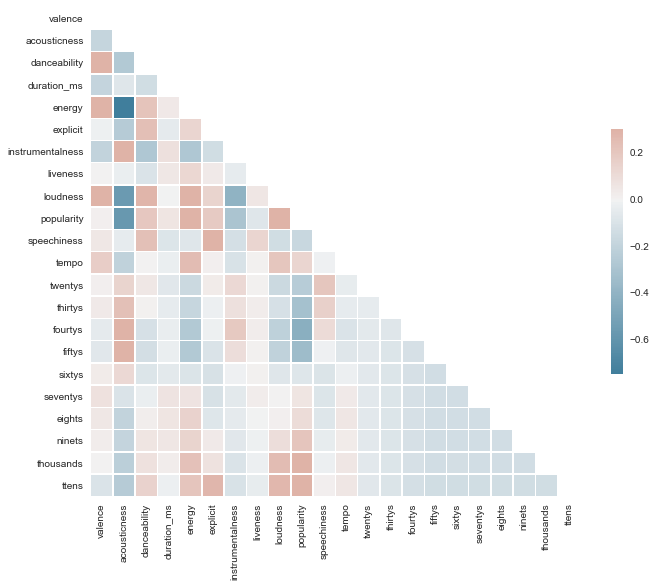

In [21]:
# Compute the correlation matrix
corr = spotify.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Modeling

In [22]:
from sklearn.preprocessing import StandardScaler
# create object
scaler = StandardScaler()
# fit
scaler.fit(spotify)
# transform 
spotify_scaled = scaler.transform(spotify)

In [23]:
spotify=spotify_scaled

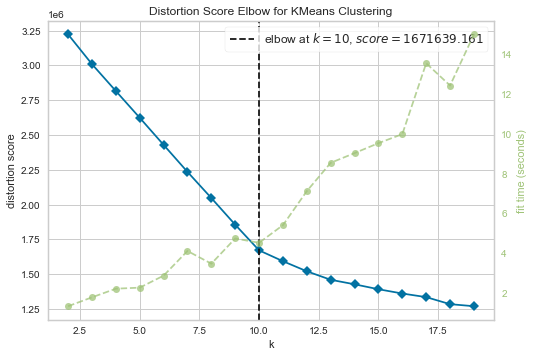

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(spotify)
visualizer.poof()

In [25]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(spotify)
pred = kmeans.predict(spotify)

In [26]:
from sklearn.metrics import silhouette_score
score = silhouette_score(spotify, pred, metric='euclidean')
score

0.3361705179703946

In [27]:
pred

array([7, 7, 7, ..., 0, 0, 0])

In [28]:
pickle.dump(kmeans, open('model.p', 'wb'))

In [29]:
predictions=pd.DataFrame(data=pred, columns=["Cluster Name"])

In [30]:
sp=pd.DataFrame(data=spotify, columns=['valence', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness',
       'popularity', 'speechiness', 'tempo', 'twentys', 'thirtys', 'fourtys',
       'fiftys', 'sixtys', 'seventys', 'eights', 'ninets', 'thousands',
       'ttens'])

In [31]:
sp["cluster"]=predictions
spotify=sp
spotify.head()

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,...,thirtys,fourtys,fiftys,sixtys,seventys,eights,ninets,thousands,ttens,cluster
0,-1.782825,1.276187,-1.467013,4.763146,-1.013988,-0.303955,2.268102,2.626719,-1.514237,-1.256808,...,-0.243459,-0.314702,-0.362807,-0.359687,-0.364356,-0.362807,-0.363334,-0.360694,-0.382732,7
1,1.650688,0.611347,1.598779,-0.399747,-0.528270,-0.303955,-0.532771,-0.262229,-0.170766,-1.210993,...,-0.243459,-0.314702,-0.362807,-0.359687,-0.364356,-0.362807,-0.363334,-0.360694,-0.382732,7
2,-1.858821,1.220340,-1.188820,2.133824,-1.182122,-0.303955,2.379754,-0.599749,-0.593551,-1.210993,...,-0.243459,-0.314702,-0.362807,-0.359687,-0.364356,-0.362807,-0.363334,-0.360694,-0.382732,7
3,-1.381564,1.236296,-1.489722,-0.166101,-0.647832,-0.303955,-0.532682,1.002043,0.377680,-1.302624,...,-0.243459,-0.314702,-0.362807,-0.359687,-0.364356,-0.362807,-0.363334,-0.360694,-0.382732,7
4,-1.047180,1.209703,-0.677855,-0.509485,-1.081242,-0.303955,-0.532765,0.132499,0.240788,-1.348440,...,-0.243459,-0.314702,-0.362807,-0.359687,-0.364356,-0.362807,-0.363334,-0.360694,-0.382732,7


### Distance to centroids

In [32]:
spotifynocluster=spotify.drop(columns="cluster", axis=1)
spotifynocluster.head()

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,...,twentys,thirtys,fourtys,fiftys,sixtys,seventys,eights,ninets,thousands,ttens
0,-1.782825,1.276187,-1.467013,4.763146,-1.013988,-0.303955,2.268102,2.626719,-1.514237,-1.256808,...,5.682574,-0.243459,-0.314702,-0.362807,-0.359687,-0.364356,-0.362807,-0.363334,-0.360694,-0.382732
1,1.650688,0.611347,1.598779,-0.399747,-0.528270,-0.303955,-0.532771,-0.262229,-0.170766,-1.210993,...,5.682574,-0.243459,-0.314702,-0.362807,-0.359687,-0.364356,-0.362807,-0.363334,-0.360694,-0.382732
2,-1.858821,1.220340,-1.188820,2.133824,-1.182122,-0.303955,2.379754,-0.599749,-0.593551,-1.210993,...,5.682574,-0.243459,-0.314702,-0.362807,-0.359687,-0.364356,-0.362807,-0.363334,-0.360694,-0.382732
3,-1.381564,1.236296,-1.489722,-0.166101,-0.647832,-0.303955,-0.532682,1.002043,0.377680,-1.302624,...,5.682574,-0.243459,-0.314702,-0.362807,-0.359687,-0.364356,-0.362807,-0.363334,-0.360694,-0.382732
4,-1.047180,1.209703,-0.677855,-0.509485,-1.081242,-0.303955,-0.532765,0.132499,0.240788,-1.348440,...,5.682574,-0.243459,-0.314702,-0.362807,-0.359687,-0.364356,-0.362807,-0.363334,-0.360694,-0.382732


In [33]:
X_dist = kmeans.transform(spotifynocluster)**2
distances=pd.DataFrame(data=X_dist,columns=["Dist to cl 0","Dist to cl 1","Dist to cl 2","Dist to cl 3","Dist to cl 4","Dist to cl 5","Dist to cl 6","Dist to cl 7","Dist to cl 8","Dist to cl 9"])
distances

,Dist to cl 0,Dist to cl 1,Dist to cl 2,Dist to cl 3,Dist to cl 4,Dist to cl 5,Dist to cl 6,Dist to cl 7,Dist to cl 8,Dist to cl 9
0,107.140503,95.804000,90.952744,103.769722,97.034316,85.358819,93.146023,46.327446,83.798666,98.195469
1,66.815783,62.353672,59.475236,65.126807,63.679331,60.625915,61.095432,10.008503,58.878995,62.614395
2,76.560470,68.606477,63.117894,74.415980,70.197306,59.473515,66.700778,18.533823,57.290821,70.178041
3,62.926748,57.435432,51.882400,60.935501,61.536896,53.347861,55.400061,12.402589,49.523691,58.551070
4,60.297019,55.059278,49.202408,58.633669,57.958887,50.479974,53.104294,7.881845,46.730905,56.005551
...,...,...,...,...,...,...,...,...,...,...
170648,4.881710,26.889772,34.077319,23.591937,54.124704,50.307435,28.422076,73.231559,42.850413,25.291754
170649,3.952433,24.700498,30.125981,22.369416,49.547152,45.880033,25.860517,68.433903,38.494568,23.637416
170650,4.996398,27.175624,33.675744,23.536170,54.571735,50.331178,28.452212,74.392755,42.896204,25.582149
170651,19.838930,48.271691,54.234771,42.892019,69.040100,63.802539,49.625164,84.571777,59.734388,44.383188


### Clusters

In [34]:
spotifyfull=pd.read_csv(r"C:\Users\Portu\Desktop\Spotify\spotify.csv")
spotifyfull.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [35]:
spotifyfull["cluster"]=predictions

In [36]:
spotifyfull=pd.merge(spotifyfull, distances, left_index=True, right_index=True)
spotifyfull.head()
spotifyfull.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'cluster', 'Dist to cl 0', 'Dist to cl 1',
       'Dist to cl 2', 'Dist to cl 3', 'Dist to cl 4', 'Dist to cl 5',
       'Dist to cl 6', 'Dist to cl 7', 'Dist to cl 8', 'Dist to cl 9'],
      dtype='object')

In [37]:
spotifyfull.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,Dist to cl 0,Dist to cl 1,Dist to cl 2,Dist to cl 3,Dist to cl 4,Dist to cl 5,Dist to cl 6,Dist to cl 7,Dist to cl 8,Dist to cl 9
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,107.140503,95.804000,90.952744,103.769722,97.034316,85.358819,93.146023,46.327446,83.798666,98.195469
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,66.815783,62.353672,59.475236,65.126807,63.679331,60.625915,61.095432,10.008503,58.878995,62.614395
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,76.560470,68.606477,63.117894,74.415980,70.197306,59.473515,66.700778,18.533823,57.290821,70.178041
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,62.926748,57.435432,51.882400,60.935501,61.536896,53.347861,55.400061,12.402589,49.523691,58.551070
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,60.297019,55.059278,49.202408,58.633669,57.958887,50.479974,53.104294,7.881845,46.730905,56.005551


### Sort for each cluster every song by the distance to the centroid. As the songs may not be really know, I choose from them the more popular ones. 

In [38]:
cluster0=spotifyfull[spotifyfull["cluster"]==0]
cluster0.columns
sort0=cluster0.sort_values(by=["Dist to cl 0"])
a25=int(len(cluster0)/100)
a25
cl0025=sort0.iloc[0:a25]
clus0=cl0025.sort_values(by="popularity").head(10)

In [39]:
cluster1=spotifyfull[spotifyfull["cluster"]==1]
sort1=cluster1.sort_values(by=["Dist to cl 1"])
a25=int(len(cluster1)/100)
a25
cl1025=sort1.iloc[0:a25]
clus1=cl1025.sort_values(by="popularity").head(10)

In [40]:
cluster2=spotifyfull[spotifyfull["cluster"]==2]
sort2=cluster2.sort_values(by=["Dist to cl 2"])
a25=int(len(cluster2)/100)
a25
cl2025=sort2.iloc[0:a25]
clus2=cl2025.sort_values(by="popularity").head(10)

In [41]:
cluster3=spotifyfull[spotifyfull["cluster"]==3]
sort3=cluster3.sort_values(by=["Dist to cl 3"])
a25=int(len(cluster3)/100)
a25
cl3025=sort3.iloc[0:a25]
clus3=cl3025.sort_values(by="popularity").head(10)

In [42]:
cluster4=spotifyfull[spotifyfull["cluster"]==4]
sort4=cluster4.sort_values(by=["Dist to cl 4"])
a25=int(len(cluster4)/100)
a25
cl4025=sort4.iloc[0:a25]
clus4=cl4025.sort_values(by="popularity").head(10)

In [43]:
cluster5=spotifyfull[spotifyfull["cluster"]==5]
sort5=cluster5.sort_values(by=["Dist to cl 5"])
a25=int(len(cluster5)/100)
a25
cl5025=sort3.iloc[0:a25]
clus5=cl5025.sort_values(by="popularity").head(10)

In [44]:
cluster6=spotifyfull[spotifyfull["cluster"]==6]
sort6=cluster6.sort_values(by=["Dist to cl 6"])
a25=int(len(cluster6)/100)
a25
cl6025=sort6.iloc[0:a25]
clus6=cl6025.sort_values(by="popularity").head(10)

In [45]:
cluster7=spotifyfull[spotifyfull["cluster"]==7]
sort7=cluster7.sort_values(by=["Dist to cl 7"])
a25=int(len(cluster7)/100)
a25
cl7025=sort7.iloc[0:a25]
clus7=cl7025.sort_values(by="popularity").head(10)

In [46]:
cluster8=spotifyfull[spotifyfull["cluster"]==8]
sort8=cluster8.sort_values(by=["Dist to cl 8"])
a25=int(len(cluster8)/100)
a25
cl8025=sort8.iloc[0:a25]
clus8=cl8025.sort_values(by="popularity").head(10)

In [47]:
cluster9=spotifyfull[spotifyfull["cluster"]==9]
sort9=cluster9.sort_values(by=["Dist to cl 9"])
a25=int(len(cluster9)/100)
a25
cl9025=sort9.iloc[0:a25]
clus9=cl9025.sort_values(by="popularity").head(10)

# Let's see spotify song for each cluster

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials("9c24b7e194394db78e3435d96a43a0d6","264f811e265b44379dcf365b69b1145e"))

In [12]:
lz_uri = "spotify:artist:7tjbDPvrdvDshcpEMXKRVb"


results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][0:1]:
    print('Play the song: ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

Play the song: https://p.scdn.co/mp3-preview/44a14bd01aee71770b24d91f871a00ccc23568d5?cid=9c24b7e194394db78e3435d96a43a0d6
cover art: https://i.scdn.co/image/ab67616d0000b273dc60cf9a010f86354e6735dd



In [52]:
clus0[["name", "artists"]]

,name,artists
139011,It Would Be You,['Johnny Gill']
168865,Can't Shake You,['Gloriana']
169253,Be Prepared,"['Jeremy Irons', 'Whoopi Goldberg', 'Cheech Ma..."
122832,Floating Vibes,['Surfer Blood']
123296,Dark Paradise,['Lana Del Rey']
123282,Just Visiting,['Wookiefoot']
106678,All Your Life,['The Band Perry']
154374,Wake Me Up - Acoustic,['Aloe Blacc']
139758,Back To The Start,['SoMo']
169338,Wasted Time,['Vance Joy']


In [53]:
clus1[["name", "artists"]]

,name,artists
162831,Closer Than Close,['The Stylistics']
149549,Real Gone Kid,['Deacon Blue']
149393,"Be Alone Tonight - From The ""School Daze"" Soun...",['Tisha Campbell']
149005,He Covers Me,['Steve Camp']
117262,Old Town,['Phil Lynott']
164087,Least Complicated,['Indigo Girls']
117129,Nexus,['Dan Fogelberg']
149555,Sentimental Street,['Night Ranger']
164043,Junior's Farm,['Wings']
163814,Another Satellite - Remastered 2001,['XTC']


In [54]:
clus2[["name", "artists"]]

,name,artists
113078,111-44,"['Oliver Nelson', 'Eric Dolphy']"
129131,Away From You,['Chuck Berry']
80689,Havin' Fun,['Dion']
129994,Things We Said Today,['The Sandpipers']
159432,In the Land of Make Believe,['The Drifters']
80565,Without A Song,['Frank Sinatra']
129825,Shadow of the Cactus,['Lorne Greene']
113347,"Crocodile, Go Home",['Henry Mancini']
130049,Go Cry On Somebody Else's Shoulder,['The Mothers Of Invention']
129201,Rain Rain Go Away,['Bobby Vinton']


In [55]:
clus3[["name", "artists"]]

,name,artists
167138,The Jealous Kind,['Chris Knight']
151819,Three Days,['Pat Green']
167096,Walking in Memphis,['Lonestar']
167141,Heart Of A Woman,['R. Kelly']
137096,Fire On the Mountain,['Iron Horse']
152207,Falling,['Ben Kweller']
151878,Telluride,['Tim McGraw']
152490,(There You Go) Tellin' Me No Again - 2007 Rema...,['Keith Sweat']
151964,Who's Crying Now,['Journey']
137674,Living And Living Well,['George Strait']


In [56]:
clus4[["name", "artists"]]

,name,artists
125133,Toque de Oración - Remasterizado,"['Francisco Canaro', 'Charlo']"
21311,Never Gonna Dance,['Fred Astaire']
109138,Stis Aretousas ti spilia,['Rita Ampatzi']
22122,Manhar Phool Khile Bagiya Men,"['Naseem Bano', 'Prem Adib']"
76196,"Haydn: String Quartet No. 33 in D Major, Op. 3...","['Franz Joseph Haydn', 'Pro Arte Quartet']"
21444,Ce Petit Chemin,"['Jean Sablon', 'Mireille']"
40136,Cobardía - Remasterizado,['Ignacio Corsini']
40548,La Ribera - Remasterizado,"['Francisco Canaro', 'Roberto Maida']"
3370,O fată ca Lizette,"['Cristian Vasile', 'Mark Albahary']"
155569,El Carretero (Polka Beniana),"['Adrián Patiño', 'Banda del Regimiento Pérez ..."


In [57]:
clus5[["name", "artists"]]

,name,artists
167096,Walking in Memphis,['Lonestar']
151819,Three Days,['Pat Green']
167138,The Jealous Kind,['Chris Knight']
137096,Fire On the Mountain,['Iron Horse']
152490,(There You Go) Tellin' Me No Again - 2007 Rema...,['Keith Sweat']
152207,Falling,['Ben Kweller']
151878,Telluride,['Tim McGraw']
137674,Living And Living Well,['George Strait']
152365,More Than Fine,['Switchfoot']
137454,Calling You - Edit,['Blue October']


In [58]:
clus6[["name", "artists"]]

,name,artists
147016,A Trick of the Tail - 2007 Remaster,['Genesis']
131101,No Time,['The Guess Who']
146701,I Cheated Me Right Out Of You,"['Moe Bandy', 'Joe Stampley']"
131270,Wings Of My Love,['Michael Jackson']
146540,She's Changing Me,['Fleetwood Mac']
161455,Save the Last Dance for Me,['Harry Nilsson']
160984,Listen to the Clock on the Wall,"[""The O'Jays""]"
161629,Spirit,['John Denver']
115275,It Takes Two to Tango (This Is for the Girls),['Todd Rundgren']
162173,Misfits,['The Kinks']


In [59]:
clus7[["name", "artists"]]

,name,artists
20182,Pasaron los Abriles - Remasterizado,['Ignacio Corsini']
57641,Corralera - Remasterizado,['Ignacio Corsini']
39099,El Pañuelito - Instrumental (Remasterizado),['Francisco Canaro']
38787,Viejo Amor - Remasterizado,"['Francisco Canaro', 'Agustín Irusta']"
38944,De Otros Tiempos - Instrumental (Remasterizado),['Francisco Canaro']
57862,Palomita Blanca - Remasterizado,['Ignacio Corsini']
20549,Negra Fiera - Instrumental (Remasterizado),['Francisco Canaro']
103,Oui Non,['Mistinguett']
1071,Veux Tu Que J'te Fasse Un Dessin,['Georgius']
92581,Espejito - Remasterizado,['Ignacio Corsini']


In [60]:
clus8[["name", "artists"]]

,name,artists
126946,Agiatreutos kaimos,['Roza Eskenazi']
157028,Shall We Dance (from The King And I) - Vocal,['Lehman Engel']
127531,"Donizetti: Lucia di Lammermoor, Act 2: ""Per te...","['Gaetano Donizetti', 'Valiano Natali', 'Coro ..."
127143,"Verdi : Un giorno di regno : Act 2 ""Si figuri ...","['Giuseppe Verdi', 'Alfredo Simonetto', 'Orche..."
95153,I puritani: Act I Scene 2: Ferma. Invan rapir ...,"['Vincenzo Bellini', 'Maria Callas', 'Giuseppe..."
110880,Learnin' the Blues,['Ted Heath']
111023,Spanioliko tragoudi,['Sofia Vempo']
157459,Ah ! scellerata ! da tua madre,"['Ermanno Wolf-Ferrari', 'Angelo Questa', 'Orc..."
43391,Tselios,['Giorgos Papasideris']
61274,Per te d'immenso giubilo,"['Gaetano Donizetti', 'Ugo Tansini', 'Orchestr..."


In [61]:
clus9[["name", "artists"]]

,name,artists
150168,Always The Last To Know - Single Mix,['Del Amitri']
166066,Baker Street - Edit,['Gerry Rafferty']
166073,Mañana De Carnaval (Manha Do Carnaval),['Luis Miguel']
150000,Built To Last,['Tom Petty and the Heartbreakers']
150362,Quiet Time To Play,['Johnny Gill']
135458,I Don't Feel No Ways Tired,['Mighty Clouds Of Joy']
164516,The Dream Is Still Alive,['Wilson Phillips']
150236,Cómo Decirte,['Liberación']
135212,Lord Have Mercy on the Working Man,['Travis Tritt']
150176,Noah's Dove,"['10,000 Maniacs']"
